Classification of JENA flower dataset flower classes using transfer learning

Trained the model using transfer learning to classify the different classes in jena flower dataset.Done preprocessing to preprocess the data in to training and validation and created folders for different classes in the dataset. Created paths access the images from the corresponding folders. Augmented data using the image generator and used for training the model.



```
# This is formatted as code
```

#GPU Activation

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=4eca6b712157a07bac44936f22b9094c23ad7b072fc36ed83a93f800e9464d0b
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 11.3 GB  | Proc size: 2.5 GB
GPU RAM Free: 256MB | Used: 7355MB | Util  97% | Total 7611MB


In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
try:
  import GPUtil as GPU
  GPUs = GPU.getGPUs()
  device='/gpu:0'
except:
  device='/cpu:0'

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras import Input
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Images Classification

In [3]:
#getting given 'class labels'
class_labels = pd.read_csv('/content/drive/My Drive/JF30-1/classlabels.txt',sep=',',header=None)
class_labels.columns = ['image_name','class_label']
print("Flowers Label \n",class_labels.head())

#extarcting images numbers from given images
class_labels['image_num'] = class_labels['image_name'].apply(lambda image_name:image_name[4:9])
class_labels['image_num'] = class_labels['image_num'].astype(int)

Flowers Label 
       image_name  class_label
0  JFT_00001.jpg            1
1  JFT_00002.jpg            1
2  JFT_00003.jpg            1
3  JFT_00004.jpg            1
4  JFT_00006.jpg            1


6     70
28    68
23    67
13    66
4     66
2     65
7     64
18    63
29    63
20    61
27    61
24    60
10    60
25    56
19    55
14    54
5     54
22    49
12    48
9     46
17    45
3     41
21    38
11    36
26    35
8     28
16    24
15    13
30    12
1     11
Name: class_label, dtype: int64



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


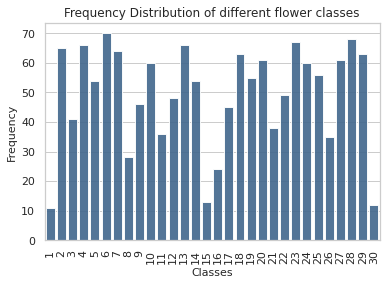

In [4]:
Class_Frequency_Count = class_labels['class_label'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="whitegrid")
sns.barplot(Class_Frequency_Count.index,Class_Frequency_Count.values,alpha=0.9,color=(0.2,0.4,0.6))
plt.title("Frequency Distribution of different flower classes")
plt.ylabel("Frequency", fontsize=11)
plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=11)
plt.show()

##   set of Training Images

In [5]:
#getting given 'train split images numbers'
train_images_label = pd.read_csv('/content/drive/My Drive/JF30-1/trn1.txt',sep=',',header=None)
train_images_label.columns = ['image_num_train']
print("\n Train Images Numbers \n",train_images_label.head())


 Train Images Numbers 
    image_num_train
0                2
1                4
2                9
3               10
4               21


In [6]:
#creating flag to identify which images belong to test and train
images_data = pd.merge(class_labels, train_images_label, how='left', left_on='image_num', right_on='image_num_train')
images_data['train_test_flag'] = 'test'
images_data.loc[images_data['image_num_train'].isna(),'train_test_flag'] = 'train'
#images_data.head()
images_data = images_data.drop('image_num_train',axis=1)
images_data.head()

,image_name,class_label,image_num,train_test_flag
0,JFT_00001.jpg,1,1,train
1,JFT_00002.jpg,1,2,test
2,JFT_00003.jpg,1,3,train
3,JFT_00004.jpg,1,4,test
4,JFT_00006.jpg,1,6,train


In [7]:
images_data['train_test_flag'].value_counts()

train    1200
test      279
Name: train_test_flag, dtype: int64

In [16]:
class_length=class_labels['class_label'].nunique()

# Images to  folders train and test

In [ ]:
from colab_util import *
drive_handler = GoogleDriveHandler()

In [ ]:
!git clone https://gist.github.com/dc7e60aa487430ea704a8cb3f2c5d6a6.git /tmp/colab_util_repo
!mv /tmp/colab_util_repo/colab_util.py colab_util.py 
!rm -r /tmp/colab_util_repo

Cloning into '/tmp/colab_util_repo'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [ ]:
!unzip -qq '/content/drive/My Drive/Colab Notebooks/JF30-1.zip'


In [ ]:
data_directory = '/content/jpg'
output_directory = '/content/drive/My Drive/Flowers'
train_path = output_directory + '/train/'
test_path = output_directory + '/test/'

In [ ]:
for i in range(1,class_length):
  drive_handler.create_folder(str(i),parent_path='Flowers/train')
  drive_handler.create_folder(str(i),parent_path='Flowers/test')


### segregation of train/test images 

In [ ]:
#Code to segregate the train/test images and put them in each of their class folder
for i in images_data.index.values:
    train_test_flag = images_data.loc[i,'train_test_flag']
    class_label = images_data.loc[i,'class_label']
    image_name = images_data.loc[i,'image_name']
    input = data_directory + '/' + image_name
    output = output_directory + '/' + train_test_flag + '/' + str(class_label)
    shutil.copy(input, output)



## Accessing the images from repective folders

JFT_00118.jpg
(968, 1000, 3)


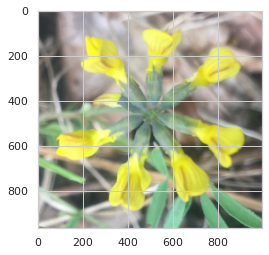

In [ ]:
#2. Reviewing the train images of class 1
print(os.listdir(train_path+'4')[0])
class_4_train = train_path+'4'+'/JFT_00126.jpg'
class_4_train
imread(class_4_train)
print(imread(class_4_train).shape)
plt.imshow(imread(class_4_train));

JFT_01132.jpg
(1000, 966, 3)


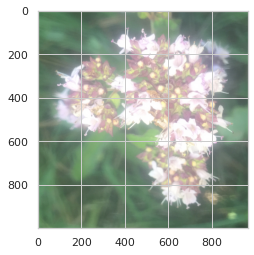

In [ ]:
#3. Reviewing the test images of class 1
print(os.listdir(test_path+'24')[0])
class_24_test = test_path+'24'+'/JFT_01132.jpg'
class_24_test
imread(class_24_test)
print(imread(class_24_test).shape)
plt.imshow(imread(class_24_test));

Image after transformation


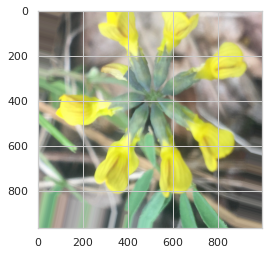

In [ ]:
#3. manipulating the images for building the model later
image_gen_train = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 0.1
                               height_shift_range=0.10, # Shift the pic height by a max of 0.1
                               #rescale=1./255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
img = imread(class_4_train)
print("Image after transformation")
plt.imshow(image_gen_train.random_transform(img));

Test Image with no transformation


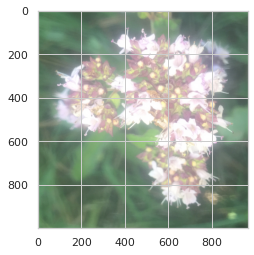

In [ ]:
#for testing
image_gen_test = ImageDataGenerator()
img = imread(class_24_test)
print("Test Image with no transformation")
plt.imshow(image_gen_test.random_transform(img));

In [ ]:
#4. Setting up of a directory to flow batches from directory
image_gen_train.flow_from_directory(train_path)
image_gen_test.flow_from_directory(test_path)

Found 1200 images belonging to 30 classes.
Found 279 images belonging to 30 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

#  Model

In [ ]:
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3
model.reset_states()
tf.keras.backend.clear_session()

image_shape = (200,200,3)
def create_model():
  vgg_conv = VGG19(weights='imagenet', include_top=False, input_shape=image_shape)
  
  for layer in vgg_conv.layers[:-2]:
    layer.trainable = False

  model = Sequential()

  model.add(vgg_conv)
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(BatchNormalization())
  
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(30, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)

  return model

with tf.device('/gpu:0'): # creating the model in the GPUStrategy scope means we will train the model on the TPU
  model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 6, 6, 512)         20024384  
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 6, 512)         2048      
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 18432)             73728     
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2

## Image Generator for Train Images and Class Labels

In [ ]:
batch_size = 16 #* tpu_strategy.num_replicas_in_sync
train_image_gen = image_gen_train.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

train_image_gen.class_indices

Found 1200 images belonging to 30 classes.


{'1': 0,
 '10': 1,
 '11': 2,
 '12': 3,
 '13': 4,
 '14': 5,
 '15': 6,
 '16': 7,
 '17': 8,
 '18': 9,
 '19': 10,
 '2': 11,
 '20': 12,
 '21': 13,
 '22': 14,
 '23': 15,
 '24': 16,
 '25': 17,
 '26': 18,
 '27': 19,
 '28': 20,
 '29': 21,
 '3': 22,
 '30': 23,
 '4': 24,
 '5': 25,
 '6': 26,
 '7': 27,
 '8': 28,
 '9': 29}

In [ ]:
test_image_gen = image_gen_test.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)


Found 279 images belonging to 30 classes.


In [ ]:
valid_steps = len(test_image_gen)
train_steps=len(train_image_gen)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

## Model Fitting

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss',patience=2)
model_history = model.fit_generator(
    generator=train_image_gen, 
    steps_per_epoch=train_steps,   
    epochs=20, 
    validation_steps=valid_steps,
    validation_data=test_image_gen,
)

Epoch 1/20
75/75 [==============================] - 36s 476ms/step - loss: 1.7391 - acc: 0.5467 - val_loss: 3.7605 - val_acc: 0.6416
Epoch 2/20
75/75 [==============================] - 35s 466ms/step - loss: 0.6024 - acc: 0.8067 - val_loss: 0.6214 - val_acc: 0.8423
Epoch 3/20
75/75 [==============================] - 36s 474ms/step - loss: 0.3965 - acc: 0.8775 - val_loss: 0.3218 - val_acc: 0.9140
Epoch 4/20
75/75 [==============================] - 35s 465ms/step - loss: 0.2831 - acc: 0.9142 - val_loss: 0.1265 - val_acc: 0.9570
Epoch 5/20
75/75 [==============================] - 35s 471ms/step - loss: 0.2272 - acc: 0.9258 - val_loss: 0.4012 - val_acc: 0.8996
Epoch 6/20
75/75 [==============================] - 35s 462ms/step - loss: 0.2043 - acc: 0.9433 - val_loss: 0.2058 - val_acc: 0.9355
Epoch 7/20
75/75 [==============================] - 35s 464ms/step - loss: 0.1726 - acc: 0.9433 - val_loss: 0.1363 - val_acc: 0.9570
Epoch 8/20
75/75 [==============================] - 35s 462ms/step - 

## Accuracy

In [ ]:
losses_valid = pd.DataFrame(model.history.history)
losses_valid.head()

,loss,acc,val_loss,val_acc
0,1.739086,0.546667,3.760491,0.641577
1,0.602396,0.806667,0.621417,0.842294
2,0.396514,0.877500,0.321785,0.913979
3,0.283052,0.914167,0.126513,0.956989
4,0.227208,0.925833,0.401229,0.899642


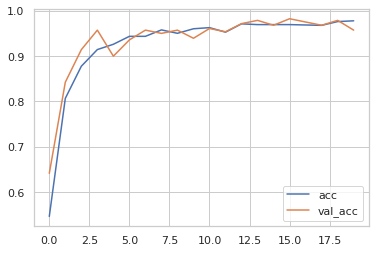

In [ ]:
losses_valid[['acc','val_acc']].plot()

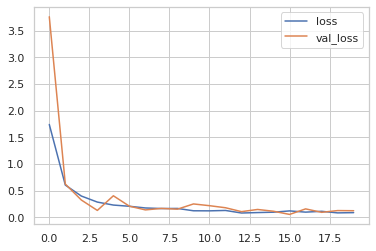

In [ ]:
losses_valid[['loss','val_loss']].plot()

In [ ]:
#7. Evaluate Model
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.12085622549057007, 0.9569892287254333]

# Predictions

In [ ]:
#8. Predicions and Evaluate
pred = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
predictions  = []
for each in range(len(pred)):
  predictions.append(np.argmax(pred[each]))
len(predictions)

279

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.83      1.00      0.91        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      0.30      0.46        10
          14       0.91      1.00      0.95        10
          15       0.91      1.00      0.95        10
          16       0.91      1.00      0.95        10
          17       1.00    

#Analysis

*   CNN Model is created using 
  - Used different  padding techniques  'same' and 'valid' to train the model and cntrol the shape of the output.Used  batch Normalization technique for identitical data distributions. Activation function used is Relu and as it is the multi class classification used softmax activation function.

-Accuary obtained in the model  for the test images is 96 percent,recall is 95 percent.
- Initially the validation loss was high but then it has reduced and smoothened.
 